### <font color = red> Tesla:  </font> Mean Reversion and Option

As of 9 Dec 2023

### <font color = green> Activation of necessary libraries. </font>

In [1]:
# Load libraries.

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl

import seaborn as sns

import time

import datetime # as dt

import warnings
warnings.filterwarnings("ignore")

> Let's set some print option.

In [2]:
np.set_printoptions(precision = 3)

plt.style.use("ggplot")

mpl.rcParams["axes.grid"] = True
mpl.rcParams["grid.color"] = "grey"
mpl.rcParams["grid.alpha"] = 0.25

mpl.rcParams["axes.facecolor"] = "white"

mpl.rcParams["legend.fontsize"] = 14

### Import historical stock data from the web

In [3]:
import pandas_datareader.data as web # this will potentially lead to an error.

from pandas_datareader import data as pdr

import yfinance as yf

(
    yf
    .pdr_override()
)


In [4]:
def extract_all(stocks, start, end):
    def extract_single_ticker(ticker):
        return(pdr
               .get_data_yahoo(ticker,
                               start = start,
                               end = end)
              )
    
    interim_DF = map(extract_single_ticker, stocks)

    return(pd
           .concat(interim_DF,
                   keys = stocks,
                   names = ["ticker", "date"]
                  )
          )

In [5]:
import datetime as dt

In [6]:
stocklist =\
[
    "TSLA",
    "SPY"
]

In [7]:
start = dt.datetime(2019, 1, 1)
end = dt.date.today()

In [8]:
stock_prices =\
    extract_all(stocklist,
                start,
                end)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [9]:
stock_prices.head(10)

Open       High        Low      Close  Adj Close  \
ticker date                                                                
TSLA   2019-01-02  20.406668  21.008667  19.920000  20.674667  20.674667   
       2019-01-03  20.466667  20.626667  19.825333  20.024000  20.024000   
       2019-01-04  20.400000  21.200001  20.181999  21.179333  21.179333   
       2019-01-07  21.448000  22.449333  21.183332  22.330667  22.330667   
       2019-01-08  22.797333  22.934000  21.801332  22.356667  22.356667   
       2019-01-09  22.366667  22.900000  22.098000  22.568666  22.568666   
       2019-01-10  22.293333  23.025999  22.119333  22.997999  22.997999   
       2019-01-11  22.806000  23.227333  22.584667  23.150667  23.150667   
       2019-01-14  22.825333  22.833332  22.266666  22.293333  22.293333   
       2019-01-15  22.333332  23.253332  22.299999  22.962000  22.962000   

                      Volume  
ticker date                   
TSLA   2019-01-02  174879000  
       2019-01-03  104478000  
       2019-01-04  110911500  
       2019-01-07  113268000  
       2019-01-08  105127500  
       2019-01-09   81493500  
       2019-01-10   90846000  
       2019-01-11   75586500  
       2019-01-14   78709500  
       2019-01-15   90849000

In [10]:
STOCKPRICE_WIDE =\
(
    stock_prices
    [["Adj Close"]]
    .reset_index()
    .pivot(index = "date",
           columns = "ticker",
           values = "Adj Close")    
)

In [11]:
STOCKPRICE_WIDE

ticker,SPY,TSLA
date,,
2019-01-02,231.492203,20.674667
2019-01-03,225.968201,20.024000
2019-01-04,233.537186,21.179333
2019-01-07,235.378494,22.330667
2019-01-08,237.589981,22.356667
...,...,...
2023-12-04,456.690002,235.580002
2023-12-05,456.600006,238.720001
2023-12-06,454.760010,239.369995


### <font color = red> Question 1</font>. Now let’s have a look at the stock price and create your strategy based on mean-reversion strategy.

### Here, specifically, please implement a mean-reversion strategy on the basis of a `Simple Moving Average of 41 days` and a `threshold value of 60 for the absolute deviation of the current price` to deviate from the Simple Moving Average to signal a positioning.

In [13]:
stock = STOCKPRICE_WIDE[["TSLA"]]
spy = STOCKPRICE_WIDE[["SPY"]]

stock =\
(
    stock.rename(
        columns={'TSLA': 'Price'}
    )
)


spy =\
(
    spy.rename(
        columns={'SPY': 'Price'}
    )
)


In [14]:

stock["SMA_41"] =\
(
    stock["Price"]
    .rolling(window = 41)
    .mean()
)


spy["SMA_41"] =\
(
    spy["Price"]
    .rolling(window = 41)
    .mean()
)



In [15]:
(
    stock
    .dropna(inplace = True)
)


(
    spy
    .dropna(inplace = True)
)


In [16]:
stock["Distance"] =\
(
    stock["Price"] - stock["SMA_41"]
)

spy["Distance"] =\
(
    spy["Price"] - spy["SMA_41"]
)

In [20]:
# Sell Position

threshold = 50

stock["Positions"] =\
(
    np
    .where(stock["Distance"] > threshold, -1, np.nan)
)

stock["Positions_Sell"] =\
(
    np
    .where(stock["Distance"] > threshold, -1, np.nan)
)

# Buy Position
stock["Positions"] =\
(
    np
    .where(stock["Distance"] < -threshold, 1, stock["Positions"])
)

stock["Positions_Buy"] =\
(
    np
    .where(stock["Distance"] < -threshold, 1, np.nan)
)

# Hold Position
stock["Positions"] =\
(
    np
    .where(stock["Distance"] * stock["Distance"].shift(1) < 0, 0, stock["Positions"])
)

stock["Positions"] =\
(
    stock["Positions"]
    .ffill()
)

stock

ticker,Price,SMA_41,Distance,Positions,Positions_Sell,Positions_Buy
date,,,,,,
2019-03-01,19.652666,20.861805,-1.209139,NaN,NaN,NaN
2019-03-04,19.024000,20.821545,-1.797545,NaN,NaN,NaN
2019-03-05,18.436001,20.782813,-2.346812,NaN,NaN,NaN
2019-03-06,18.416000,20.715415,-2.299414,NaN,NaN,NaN
2019-03-07,18.439333,20.620504,-2.181171,NaN,NaN,NaN
...,...,...,...,...,...,...
2023-12-04,235.580002,231.333902,4.246099,0.0,NaN,NaN
2023-12-05,238.720001,230.801951,7.918050,0.0,NaN,NaN
2023-12-06,239.369995,230.306829,9.063166,0.0,NaN,NaN


### <font color = red> Question 2</font>. Now, please plot your buy positions using red dots, and your sell positions using blue dots, as shown below.

<Axes: xlabel='date'>

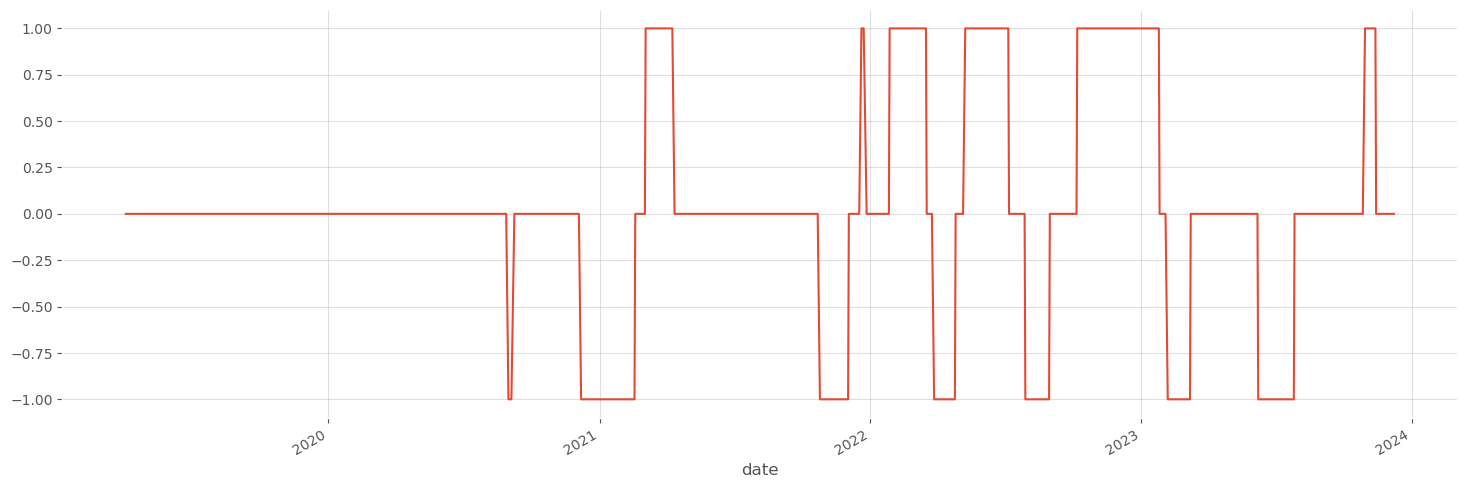

In [21]:
(
    stock
    ["Positions"]
    .plot(figsize = [18, 6],
          ylim = [-1.10, 1.10]
         )
)

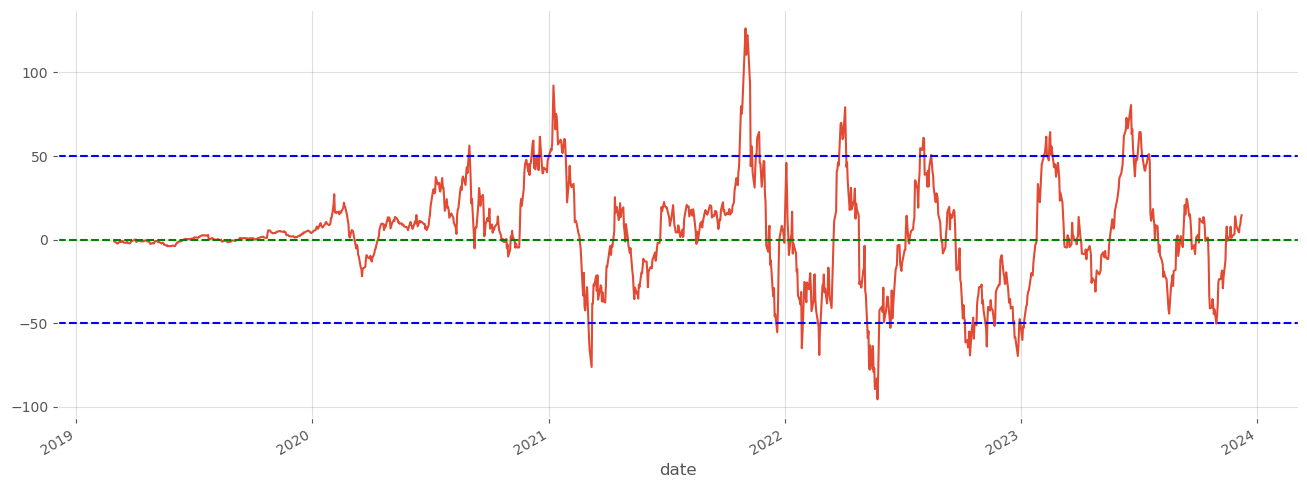

In [23]:

stock["Distance"].dropna().plot(figsize = [16,6])

plt.axhline(threshold, color = "blue", ls = "--")

plt.axhline(0, color = "green", ls = "--")

plt.axhline(-threshold, color = "blue", ls = "--")

In [25]:
# __ Trading opportunities found.

stock["Positions_Buy"].sum() - stock["Positions_Sell"].sum()

127.0

### <font color = red> Question 3</font>. Please draw the strategy returns as shown below.

In [29]:
stock["RETURNS"] =\
(
    np
    .log(stock["Price"] / stock["Price"].shift(1)
         )
)

stock

ticker,Price,SMA_41,Distance,Positions,Positions_Sell,Positions_Buy,RETURNS,STRATEGY
date,,,,,,,,
2019-03-01,19.652666,20.861805,-1.209139,NaN,NaN,NaN,NaN,NaN
2019-03-04,19.024000,20.821545,-1.797545,NaN,NaN,NaN,-0.032512,NaN
2019-03-05,18.436001,20.782813,-2.346812,NaN,NaN,NaN,-0.031396,NaN
2019-03-06,18.416000,20.715415,-2.299414,NaN,NaN,NaN,-0.001085,NaN
2019-03-07,18.439333,20.620504,-2.181171,NaN,NaN,NaN,0.001266,NaN
...,...,...,...,...,...,...,...,...
2023-12-04,235.580002,231.333902,4.246099,0.0,NaN,NaN,-0.013701,-0.0
2023-12-05,238.720001,230.801951,7.918050,0.0,NaN,NaN,0.013241,0.0
2023-12-06,239.369995,230.306829,9.063166,0.0,NaN,NaN,0.002719,0.0


In [30]:
stock["STRATEGY"] =\
(
    stock["Positions"].shift(1)
    *
    stock["RETURNS"]
)

stock

ticker,Price,SMA_41,Distance,Positions,Positions_Sell,Positions_Buy,RETURNS,STRATEGY
date,,,,,,,,
2019-03-01,19.652666,20.861805,-1.209139,NaN,NaN,NaN,NaN,NaN
2019-03-04,19.024000,20.821545,-1.797545,NaN,NaN,NaN,-0.032512,NaN
2019-03-05,18.436001,20.782813,-2.346812,NaN,NaN,NaN,-0.031396,NaN
2019-03-06,18.416000,20.715415,-2.299414,NaN,NaN,NaN,-0.001085,NaN
2019-03-07,18.439333,20.620504,-2.181171,NaN,NaN,NaN,0.001266,NaN
...,...,...,...,...,...,...,...,...
2023-12-04,235.580002,231.333902,4.246099,0.0,NaN,NaN,-0.013701,-0.0
2023-12-05,238.720001,230.801951,7.918050,0.0,NaN,NaN,0.013241,0.0
2023-12-06,239.369995,230.306829,9.063166,0.0,NaN,NaN,0.002719,0.0


<Axes: xlabel='date'>

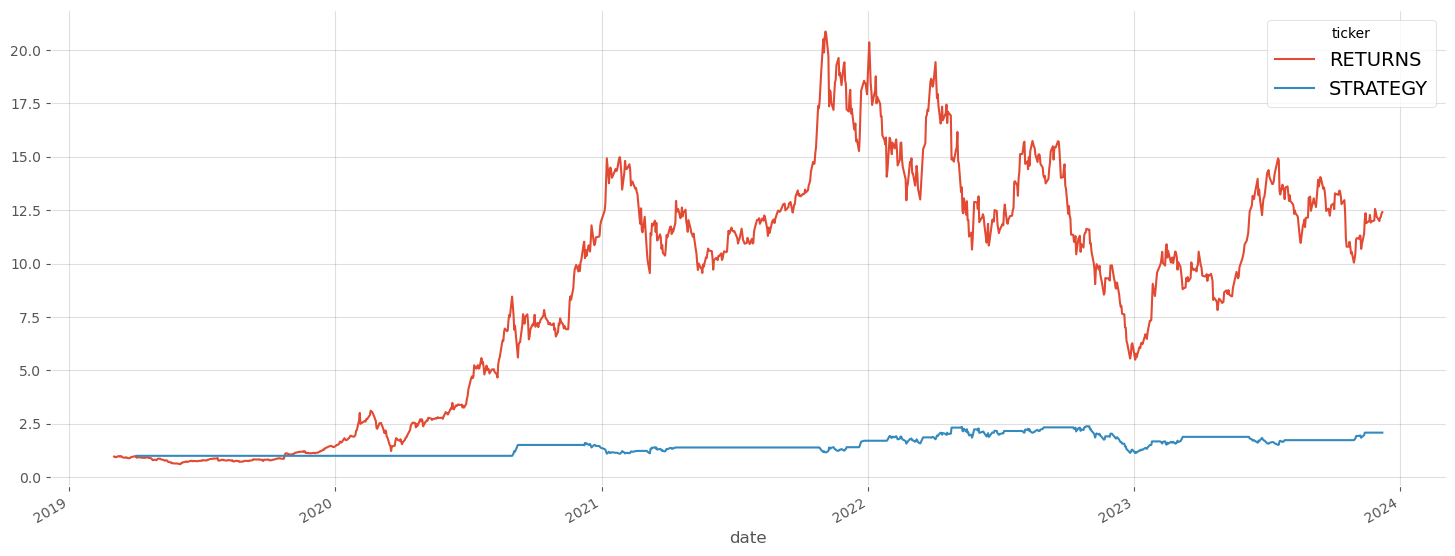

In [31]:
(
    stock
    [["RETURNS", "STRATEGY"]]
    # .dropna()
    .cumsum()
    .apply(np.exp)
    .plot(figsize = [18, 7]
         )
)

### <font color = red> Question 4.</font> Please calculate the Sharpe Ratio of the strategies

In [32]:
Sharpe =\
(
    (stock["STRATEGY"].mean() / stock["STRATEGY"].std()
     * 
     np.sqrt(252)
    )
)
Sharpe

0.40545485995326697

### <font color = red> Question 5</font>. Please calculate the Compound Annual Growth Rate (CAGR) of the strategies 

In [33]:
days =\
(
    (stock.index[-1]
     -
     stock.index[0]
     ).days
)
days

1743

In [34]:
CAGR =\
(
(    
    (stock["Price"][-1] / stock["Price"][0]
     ) ** (365.0 / days)
)
    -1
)
CAGR

0.694444046354332

In [35]:
CAGR_STRATEGY =\
(
    (
    stock
    [["STRATEGY"]]
    # .dropna()
    .cumsum()
    .apply(np.exp)
    ["STRATEGY"][-1]
    ** (365.0 / days)
    ) - 1
)

CAGR_STRATEGY

0.16626960100031973

### <font color = red> Question 6</font>. Calculate 5- day price change, standard deviation for a weekly call


In [36]:
stock["Price_5D"] = stock["Price"].shift(5)
stock["Price_10D"] = stock["Price"].shift(10)

In [37]:
stock["Change_5D"] =  stock["Price"] - stock["Price_5D"]
stock["Change_10D"] =  stock["Price"] - stock["Price_10D"]

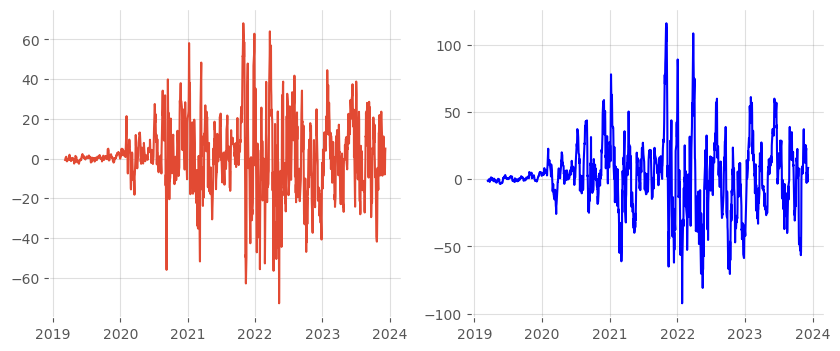

In [38]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))  # 1 row, 2 columns

axs[0].plot(stock["Change_5D"])

axs[1].plot(stock["Change_10D"], color = "blue")


In [39]:
stock.mean()

ticker
Price             174.947654
SMA_41            171.437112
Distance            3.510542
Positions           0.009314
Positions_Sell     -1.000000
Positions_Buy       1.000000
RETURNS             0.002093
STRATEGY            0.000622
Price_5D          174.676251
Price_10D         174.397802
Change_5D           0.922587
Change_10D          1.856122
dtype: float64

In [40]:
stock.median()

ticker
Price             202.458336
SMA_41            199.185731
Distance            2.048809
Positions           0.000000
Positions_Sell     -1.000000
Positions_Buy       1.000000
RETURNS             0.002168
STRATEGY            0.000000
Price_5D          202.039993
Price_10D         201.665001
Change_5D           0.530667
Change_10D          1.391332
dtype: float64

In [41]:
stock.std()

ticker
Price             106.854437
SMA_41            106.281279
Distance           29.380356
Positions           0.560642
Positions_Sell      0.000000
Positions_Buy       0.000000
RETURNS             0.041115
STRATEGY            0.024371
Price_5D          106.994096
Price_10D         107.130978
Change_5D          17.345150
Change_10D         25.462410
dtype: float64

Text(0.5, 1.0, '10-day price change histogram, sd = 6.9 ')

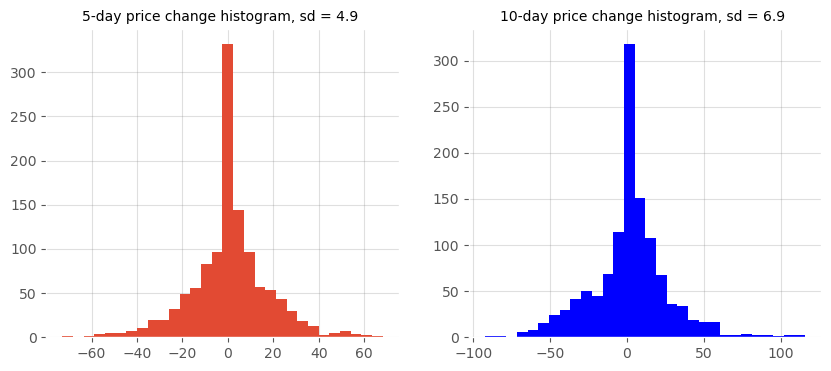

In [42]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))  # 1 row, 2 columns

axs[0].hist(stock["Change_5D"], bins=30)
axs[0].set_title("5-day price change histogram, sd = 4.9 ", fontsize = 10)

axs[1].hist(stock["Change_10D"], bins = 30, color = "blue")
axs[1].set_title("10-day price change histogram, sd = 6.9 ", fontsize = 10)

##### Sell weekly call strike at 20 USD above current price - 16% probability that the call will be exercised! 
##### Sell bi-weekly call strike at 28-29 USD above current price - 16% probability that the call will be exercised! 

In [43]:
Percentiles_5D = stock[['Change_5D']].quantile([0.25, 0.5, 0.75])

In [44]:
Percentiles_5D

ticker,Change_5D
0.25,-6.789993
0.50,0.530667
0.75,8.511333


In [45]:
Percentiles_10D = stock[['Change_10D']].quantile([0.25, 0.5, 0.75])

In [46]:
Percentiles_10D

ticker,Change_10D
0.25,-8.085665
0.50,1.391332
0.75,12.865002


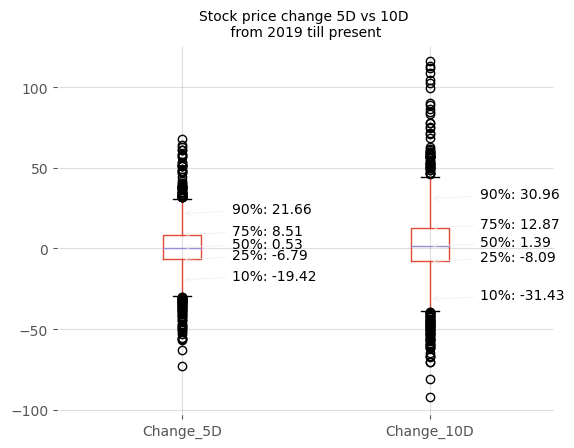

In [53]:
ax = stock[["Change_5D", "Change_10D"]].boxplot()

percentiles = stock[["Change_5D", "Change_10D"]].quantile([0.1, 0.25, 0.5, 0.75, 0.9])
percentiles.columns=[1, 2] # for plotting purpose

for col, perc_values in percentiles.iteritems():
    for i, perc in enumerate([10, 25, 50, 75, 90]):
        ax.annotate(f"{perc}%: {perc_values.iloc[i]:.2f}", xy=(col, perc_values.iloc[i]),
                    xytext=(col+0.2, perc_values.iloc[i]), arrowprops=dict(facecolor='black', arrowstyle='->'))

ax.set_title(f"Stock price change 5D vs 10D \n from 2019 till present ", fontsize = 10)

plt.savefig("Stock_5D_vs_10D.png", dpi=300, bbox_inches='tight')


### <font color = red> Question 7</font>. Calculate 5- day, 10-day price change for past 1 year only


In [49]:
stock.columns

Index(['Price', 'SMA_41', 'Distance', 'Positions', 'Positions_Sell',
       'Positions_Buy', 'RETURNS', 'STRATEGY', 'Price_5D', 'Price_10D',
       'Change_5D', 'Change_10D'],
      dtype='object', name='ticker')

In [50]:
stock_1Y = stock[['Change_5D', 'Change_10D']].iloc[-270:] # 252 tradig days each year

In [51]:
stock_1Y

ticker,Change_5D,Change_10D
date,,
2022-11-11,-11.500000,-32.550003
2022-11-14,-6.130005,-36.589996
2022-11-15,3.119995,-33.400009
2022-11-16,9.330002,-28.059998
2022-11-17,-7.550003,-32.139999
...,...,...
2023-12-04,-0.500000,1.279999
2023-12-05,-8.000000,3.119995
2023-12-06,-4.770004,-1.830002


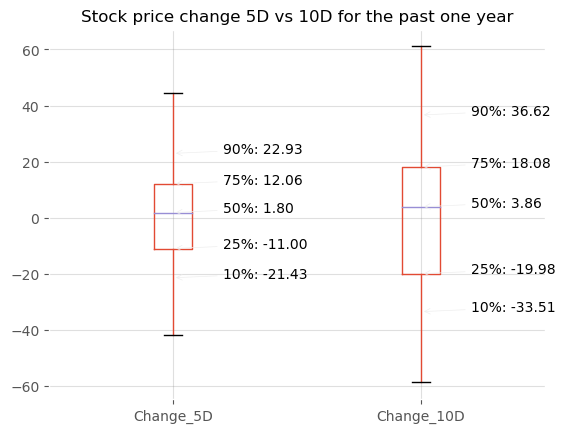

In [54]:
ax = stock_1Y[["Change_5D", "Change_10D"]].boxplot()

percentiles = stock_1Y[["Change_5D", "Change_10D"]].quantile([0.1, 0.25, 0.5, 0.75, 0.9])
percentiles.columns=[1, 2] # for plotting purpose

for col, perc_values in percentiles.iteritems():
    for i, perc in enumerate([10, 25, 50, 75, 90]):
        ax.annotate(f"{perc}%: {perc_values.iloc[i]:.2f}", xy=(col, perc_values.iloc[i]),
                    xytext=(col+0.2, perc_values.iloc[i]), arrowprops=dict(facecolor='black', arrowstyle='->'))

ax.set_title(f"Stock price change 5D vs 10D for the past one year", fontsize = 12)

plt.savefig("Stock_1_Year.png", dpi=300, bbox_inches='tight')

### <font color = red> Question 8</font>. Simple Momentum Strategy

In [56]:
short = 20
long = 80

In [58]:
BUY_or_SELL =\
(
    pd
    .DataFrame(index = stock.index)
)

BUY_or_SELL["BUY_or_SELL"] = 0.0
BUY_or_SELL

,BUY_or_SELL
date,
2019-03-01,0.0
2019-03-04,0.0
2019-03-05,0.0
2019-03-06,0.0
2019-03-07,0.0
...,...
2023-12-04,0.0
2023-12-05,0.0
2023-12-06,0.0


In [59]:
stock.head()

ticker,Price,SMA_41,Distance,Positions,Positions_Sell,Positions_Buy,RETURNS,STRATEGY,Price_5D,Price_10D,Change_5D,Change_10D
date,,,,,,,,,,,,
2019-03-01,19.652666,20.861805,-1.209139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-04,19.024000,20.821545,-1.797545,NaN,NaN,NaN,-0.032512,NaN,NaN,NaN,NaN,NaN
2019-03-05,18.436001,20.782813,-2.346812,NaN,NaN,NaN,-0.031396,NaN,NaN,NaN,NaN,NaN
2019-03-06,18.416000,20.715415,-2.299414,NaN,NaN,NaN,-0.001085,NaN,NaN,NaN,NaN,NaN
2019-03-07,18.439333,20.620504,-2.181171,NaN,NaN,NaN,0.001266,NaN,NaN,NaN,NaN,NaN


In [60]:
BUY_or_SELL["shorter_SMA"] =\
(
    stock
    ["Price"]
    .rolling(window = short,
             min_periods = 1,
             center = False)
    .mean()
)

# Longer-term 

BUY_or_SELL["longer_SMA"] =\
(
    stock
    ["Price"]
    .rolling(window = long,
             min_periods = 1,
             center = False)
    .mean()   
)

BUY_or_SELL

,BUY_or_SELL,shorter_SMA,longer_SMA
date,,,
2019-03-01,0.0,19.652666,19.652666
2019-03-04,0.0,19.338333,19.338333
2019-03-05,0.0,19.037556,19.037556
2019-03-06,0.0,18.882167,18.882167
2019-03-07,0.0,18.793600,18.793600
...,...,...,...
2023-12-04,0.0,232.396500,240.000125
2023-12-05,0.0,233.369000,239.951000
2023-12-06,0.0,234.228500,239.946125


In [61]:
# create signal

BUY_or_SELL["BUY_or_SELL"]

date
2019-03-01    0.0
2019-03-04    0.0
2019-03-05    0.0
2019-03-06    0.0
2019-03-07    0.0
             ... 
2023-12-04    0.0
2023-12-05    0.0
2023-12-06    0.0
2023-12-07    0.0
2023-12-08    0.0
Name: BUY_or_SELL, Length: 1204, dtype: float64

In [62]:
BUY_or_SELL["BUY_or_SELL"][short: ] =\
(
    np
    .where(BUY_or_SELL["shorter_SMA"][short: ] > BUY_or_SELL["longer_SMA"][short: ],
           1.0, 0.0)
)

BUY_or_SELL

,BUY_or_SELL,shorter_SMA,longer_SMA
date,,,
2019-03-01,0.0,19.652666,19.652666
2019-03-04,0.0,19.338333,19.338333
2019-03-05,0.0,19.037556,19.037556
2019-03-06,0.0,18.882167,18.882167
2019-03-07,0.0,18.793600,18.793600
...,...,...,...
2023-12-04,0.0,232.396500,240.000125
2023-12-05,0.0,233.369000,239.951000
2023-12-06,0.0,234.228500,239.946125


In [63]:
BUY_or_SELL["Positions"] =\
(
    BUY_or_SELL["BUY_or_SELL"]
    .diff()
)

BUY_or_SELL

,BUY_or_SELL,shorter_SMA,longer_SMA,Positions
date,,,,
2019-03-01,0.0,19.652666,19.652666,NaN
2019-03-04,0.0,19.338333,19.338333,0.0
2019-03-05,0.0,19.037556,19.037556,0.0
2019-03-06,0.0,18.882167,18.882167,0.0
2019-03-07,0.0,18.793600,18.793600,0.0
...,...,...,...,...
2023-12-04,0.0,232.396500,240.000125,0.0
2023-12-05,0.0,233.369000,239.951000,0.0
2023-12-06,0.0,234.228500,239.946125,0.0


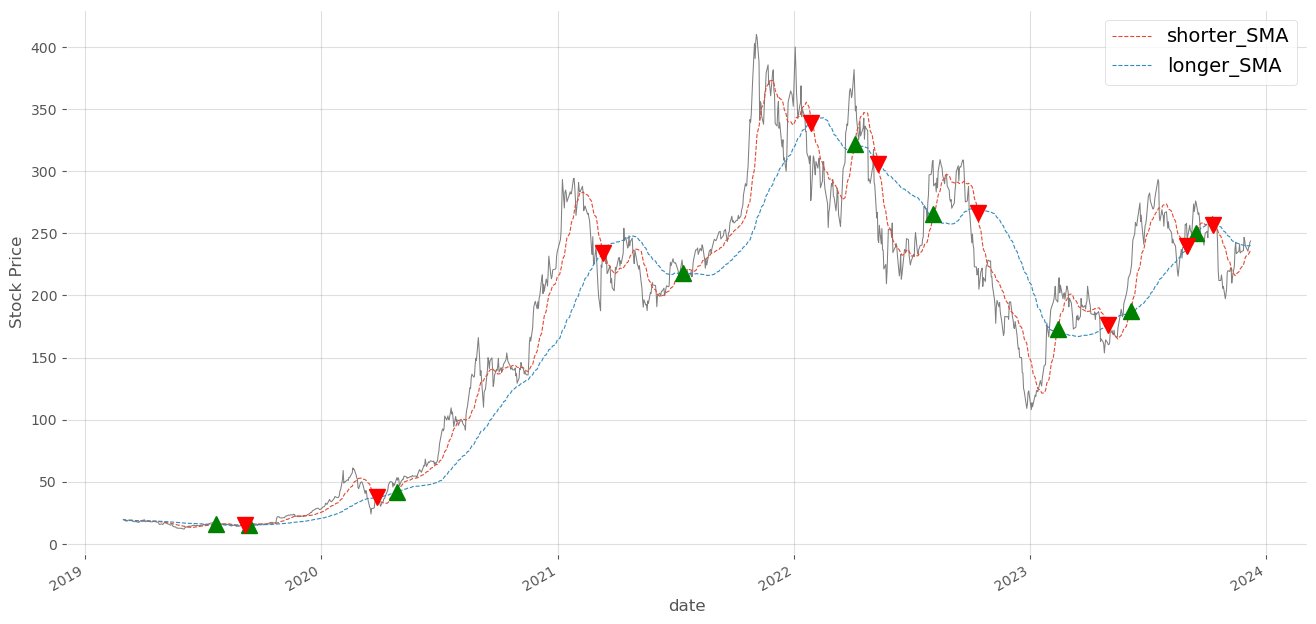

In [64]:
fig =\
(
    plt
    .figure(figsize = [16, 8]
           )
)

sub =\
(
    fig
    .add_subplot(111,
                 ylabel = "Stock Price")
)

(
    stock
    ["Price"]
    .plot(ax = sub,
          color = "grey",
          lw = 0.75)
)

(
    BUY_or_SELL
    [["shorter_SMA", "longer_SMA"]]
    .plot(ax = sub,
          style = ["--", "--"],
          lw = 0.80
         )
)

# Buy Signal 

(
    sub
    .plot(BUY_or_SELL.loc[BUY_or_SELL.Positions == 1.0].index,
          BUY_or_SELL.shorter_SMA[BUY_or_SELL.Positions == 1.0],
         "^",
         color = "green",
         markersize = 12)
)

# Sell Signal

(
    sub
    .plot(BUY_or_SELL.loc[BUY_or_SELL.Positions == -1.0].index,
          BUY_or_SELL.shorter_SMA[BUY_or_SELL.Positions == -1.0],
         "v",
         color = "red",
         markersize = 12)
)

plt.show()